This notebook contains code that demonstrates linear regression. Uncomment lines to learn more.

In [75]:
# Import tensorflow and other libraries.
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf

import numpy as np
import math

%matplotlib inline
import pylab

In [76]:
sess = None
def resetSession():
    tf.reset_default_graph()
    global sess
    if sess is not None: sess.close()
    sess = tf.InteractiveSession()

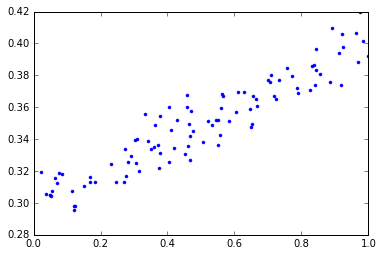

In [77]:
resetSession()

# Create input data using NumPy. y = x * 0.1 + 0.3 + noise
x_train = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_train = x_train * 0.1 + 0.3 + noise

# Uncomment the following line to plot our input data.
pylab.plot(x_train, y_train, '.')

In [78]:
# Create some fake evaluation data
x_eval = np.random.rand(len(x_train)).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_train))
y_eval = x_eval * 0.1 + 0.3 + noise

In [79]:
# Build inference graph.
# Create Variables W and b that compute y_data = W * x_data + b
W = tf.Variable(tf.random_normal([1]), name='weights')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Uncomment the following lines to see what W and b are.
print(W)
print(b)

# Create a placeholder we'll use later to feed x's into the graph for training and eval.
# shape=[None] means we can put in any number of examples. 
# This is used for minibatch training, and to evaluate a lot of examples at once.
x = tf.placeholder(shape=[None], dtype=tf.float32, name='x')

# Uncomment this line to see what x is
print(x)

# This is the same as tf.add(tf.mul(W, x), b), but looks nicer
y = W * x + b

Tensor("x:0", shape=(?,), dtype=float32)


In [80]:
# Write the graph so we can look at it in TensorBoard
# https://www.tensorflow.org/versions/r0.10/how_tos/summaries_and_tensorboard/index.html
sw = tf.train.SummaryWriter('summaries/', graph=tf.get_default_graph())

In [81]:
# Create a placeholder we'll use later to feed the correct y value into the graph
y_label = tf.placeholder(shape=[None], dtype=tf.float32, name='y_label')
print (y_label)

Tensor("y_label:0", shape=(?,), dtype=float32)


In [82]:
# Build training graph.
loss = tf.reduce_mean(tf.square(y - y_label))  # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(0.5)  # Create an optimizer.
train = optimizer.minimize(loss)  # Create an operation that minimizes loss.

# Uncomment the following 3 lines to see what 'loss', 'optimizer' and 'train' are.
print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)

loss: Tensor("Mean:0", shape=(), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x10ea1c6d8>
train: name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_weights/ApplyGradientDescent"
input: "^GradientDescent/update_bias/ApplyGradientDescent"



In [83]:
# Create an operation to initialize all the variables.
init = tf.initialize_all_variables()
print(init)
sess.run(init)

name: "init"
op: "NoOp"
input: "^weights/Assign"
input: "^bias/Assign"



In [84]:
# Uncomment the following line to see the initial W and b values.
print(sess.run([W, b]))

[array([ 0.68287498], dtype=float32), array([ 0.61071092], dtype=float32)]


In [85]:
# Uncomment these lines to test that we can compute a y from an x (without having trained anything). 
# x must be a vector, hence [3] not just 3.
x_in = [3]
sess.run(y, feed_dict={x: x_in})

array([ 2.65933585], dtype=float32)

In [86]:
# Calculate loss on the evaluation data before training
def eval_loss():
    return sess.run(loss, feed_dict={x: x_eval, y_label: y_eval})
eval_loss()

0.3676528

In [87]:
# Track of how loss changes, so we can visualize it in TensorBoard
tf.scalar_summary('loss', loss)
summary_op = tf.merge_all_summaries()

In [132]:
# Perform training.
for step in range(201):
    # Run the training op; feed the training data into the graph
    summary_str, _ = sess.run([summary_op, train], feed_dict={x: x_train, y_label: y_train})
    sw.add_summary(summary_str, step)
    # Uncomment the following two lines to watch training happen real time.
    if step % 20 == 0:
        print(step, sess.run([W, b]))

0 [array([ 52.49344254], dtype=float32), array([-9.19296837], dtype=float32)]
20 [array([ 52.49350739], dtype=float32), array([-9.19300365], dtype=float32)]
40 [array([ 52.4935112], dtype=float32), array([-9.19300747], dtype=float32)]
60 [array([ 52.4935112], dtype=float32), array([-9.19300747], dtype=float32)]
80 [array([ 52.4935112], dtype=float32), array([-9.19300747], dtype=float32)]
100 [array([ 52.4935112], dtype=float32), array([-9.19300747], dtype=float32)]
120 [array([ 52.4935112], dtype=float32), array([-9.19300747], dtype=float32)]
140 [array([ 52.4935112], dtype=float32), array([-9.19300747], dtype=float32)]
160 [array([ 52.4935112], dtype=float32), array([-9.19300747], dtype=float32)]
180 [array([ 52.4935112], dtype=float32), array([-9.19300747], dtype=float32)]
200 [array([ 52.4935112], dtype=float32), array([-9.19300747], dtype=float32)]


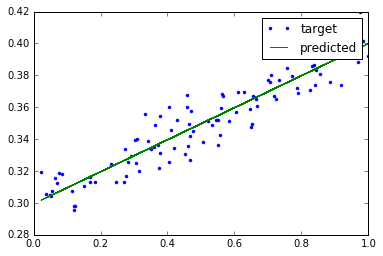

In [89]:
# Uncomment the following lines to plot the predicted values
pylab.plot(x_train, y_train, '.', label="target")
pylab.plot(x_train, sess.run(y, feed_dict={x: x_train, y_label: y_train}), label="predicted")
pylab.legend()

In [136]:
# Check accuracy on eval data after training
eval_loss()

763.72467

[array([-0.47423619], dtype=float32), array([ 1.16281998], dtype=float32)]
[-0.25988853 -0.73412478]
initial value of loss function is 402.968
0 [array([ 8.70236111], dtype=float32), array([ 13.33916569], dtype=float32)]
20 [array([ 38.55796432], dtype=float32), array([-2.70727015], dtype=float32)]
40 [array([ 45.57508087], dtype=float32), array([-5.87017679], dtype=float32)]
60 [array([ 47.1724472], dtype=float32), array([-6.59017658], dtype=float32)]
80 [array([ 47.53607559], dtype=float32), array([-6.75407839], dtype=float32)]
100 [array([ 47.61885071], dtype=float32), array([-6.79138899], dtype=float32)]
120 [array([ 47.63769531], dtype=float32), array([-6.79988241], dtype=float32)]
140 [array([ 47.64198685], dtype=float32), array([-6.80181599], dtype=float32)]
160 [array([ 47.64295959], dtype=float32), array([-6.80225515], dtype=float32)]
180 [array([ 47.64318085], dtype=float32), array([-6.80235577], dtype=float32)]
200 [array([ 47.64322662], dtype=float32), array([-6.80237675], 

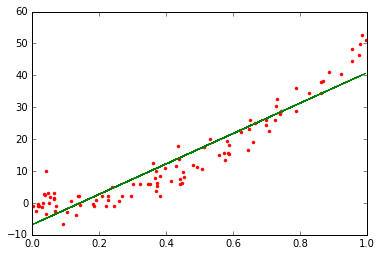

In [163]:
resetSession()

x_train = np.random.rand(100).astype(np.float32)
e_train = np.random.normal(loc = 0, scale = 3, size = 100).astype(np.float32)
y_train = 0.1 + 50*x_train**2 + e_train
#pylab.plot(x_train, y_train, 'r.')

x_test = np.random.rand(len(x_train)).astype(np.float32)
e_test = np.random.normal(loc = 0, scale = 3, size = len(x_train)).astype(np.float32)
y_test = 0.1 + 50*x_test**2 + e_test
#pylab.plot(x_test, y_test, 'b.')

# Build computational graph next

W = tf.Variable(tf.random_normal([1]), name = "coefficients", dtype = tf.float32)
b = tf.Variable(tf.random_normal([1]), name = "offset", dtype = tf.float32)

x = tf.placeholder(dtype = tf.float32, shape = [None], name = "x")

#y will hold the predicted values
y = tf.add(tf.mul(W, x),b)

summary = tf.train.SummaryWriter("summaries/", graph=tf.get_default_graph())

#y_label is meant to hold the eval values
y_label = tf.placeholder(shape = [None], dtype=tf.float32, name = "y_label")

loss = tf.reduce_mean(tf.square(y - y_label))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()

#initialize all variables

sess.run(init)
# apparently I can 'run' a list of ops like so:
print(sess.run([W,b]))

x_in = [3,4]
print(sess.run(y, feed_dict={x:x_in}))

#evaluate the loss function:

def eval_loss():
    return sess.run(loss, feed_dict= {x: x_test, y_label:y_test})
print("initial value of loss function is", eval_loss())

tf.scalar_summary("loss", loss)
summary_op = tf.merge_all_summaries()

for step in range(201):
    summary_str, _ = sess.run([summary_op, train], feed_dict={x:x_train, y_label:y_train})
    summary.add_summary(summary_str, step)
    if step%20 == 0:
        print(step, sess.run([W,b]))
print("final value of loss function is ", eval_loss())


pylab.plot(x_train, y_train, "r.")
pylab.plot(x_train, sess.run(y, feed_dict = {x:x_train}, ), "g-")

def prediction(x_in):
    return sess.run(y, feed_dict={x:x_in})

#save the model

saver = tf.train.Saver()
saver.save(sess, "soumya_checkpoint.ckpt")

#make predictions

print(predict(5))

Demonstrate saving and restoring a model

In [91]:
def predict(x_in): return sess.run(y, feed_dict={x: [x_in]})

In [92]:
# Save the model
saver = tf.train.Saver()
saver.save(sess, 'my_checkpoint.ckpt')

'my_checkpoint.ckpt'

In [93]:
# Current prediction
predict(3)

array([ 0.60075808], dtype=float32)

In [94]:
# Reset the model by running the init op again
sess.run(init) 

In [95]:
# Prediction after variables reinitialized
predict(3)

array([-1.09287131], dtype=float32)

In [96]:
saver.restore(sess, 'my_checkpoint.ckpt')

In [97]:
# Predictions after variables restored
predict(3)

array([ 0.60075808], dtype=float32)